# Perceptron Algorithm

<img src="Udacity_DS_01_algorithm.png" width="808" height="221"/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
#def perceptronStep(X, y, W, b, learn_rate = 0.01):
    # Fill in code
#    return W, b
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25, show_each_step=False):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    np.random.seed(42)
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    counter = num_epochs
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        abline(-W[0]/W[1], -b/W[1], color)
        if show_each_step:
            visualizeData(X,y)
            plt.show()
    if not show_each_step:
        visualizeData(X,y)
        plt.show()
    return boundary_lines

In [2]:
def visualizeData(X, y, showPlot=True, margins_size=0.2):
  
    plt.grid(False)
    
    # Plot margins size
    plt.margins(margins_size)
        
    plt.scatter(X[np.argwhere(y==0).flatten(), 0], X[np.argwhere(y==0).flatten(), 1], s=50, color='blue', edgecolor='k')
    plt.scatter(X[np.argwhere(y==1).flatten(), 0], X[np.argwhere(y==1).flatten(), 1], s=50, color='red', edgecolor='k')

    if showPlot:
        plt.show()

In [3]:
def abline(slope, intercept, color='red'):
    """Plot a line from slope and intercept"""
    #axes = plt.gca()
    axes = plt.gca()
    axes.set_xlim([-0.2,1.2])
    axes.set_ylim([-0.2,1.2])
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color = color)

In [4]:
# Read data
data1 = np.asarray(pd.read_csv('Udacity_DS_01_data1.csv', header=None))

# Assign the features to the variable X, and the labels to the variable y
X = data1[:,0:-1]
y = data1[:,-1]

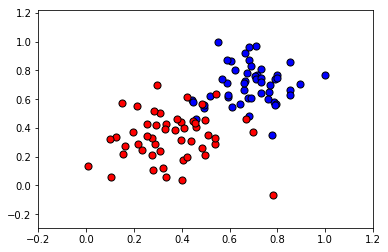

In [5]:
visualizeData(X, y)

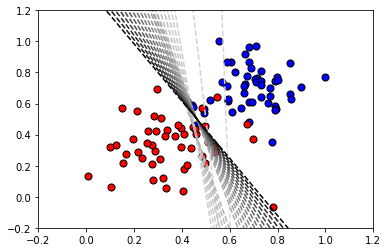

In [6]:
trainPerceptronAlgorithm(X, y, show_each_step=False);

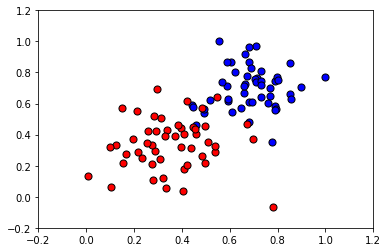

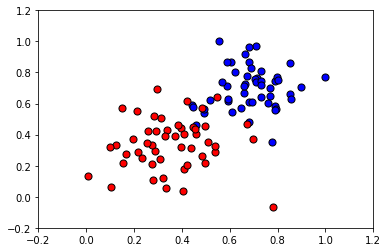

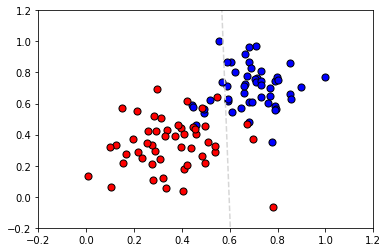

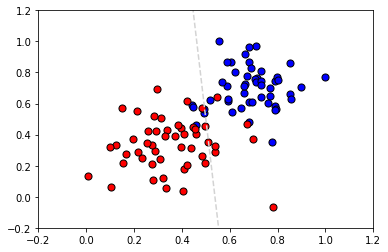

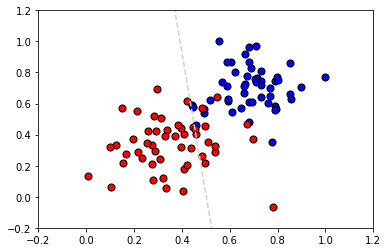

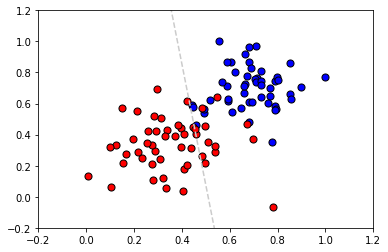

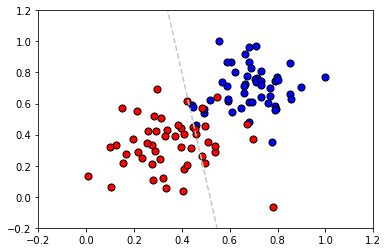

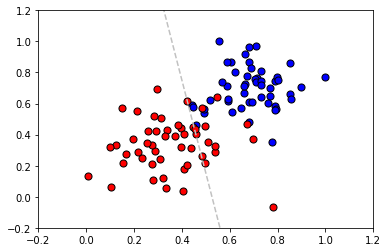

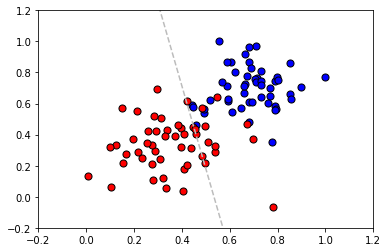

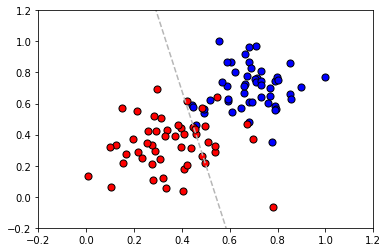

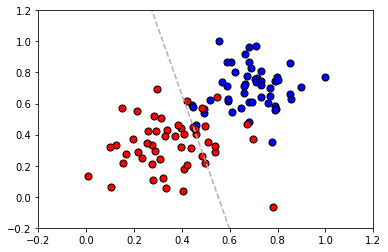

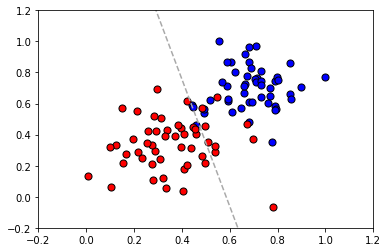

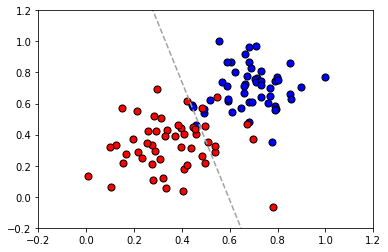

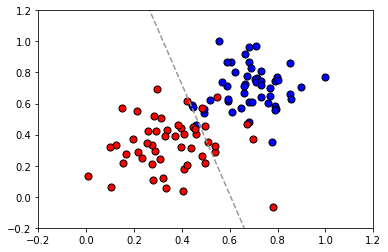

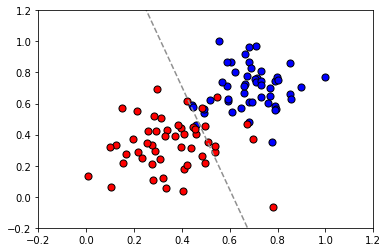

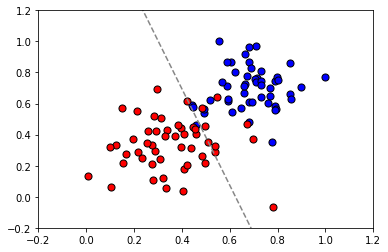

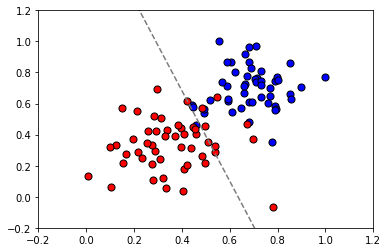

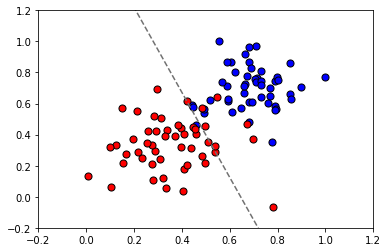

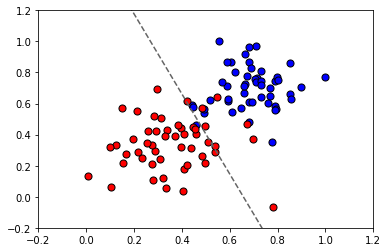

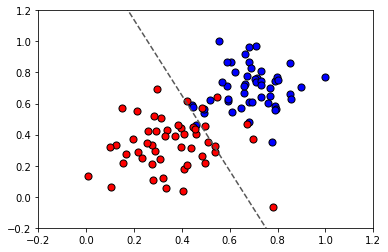

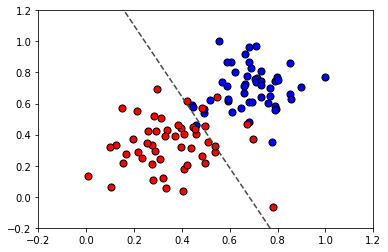

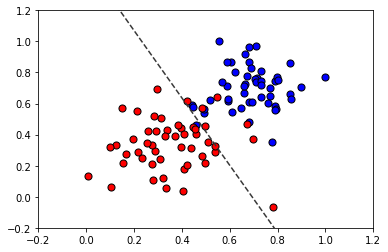

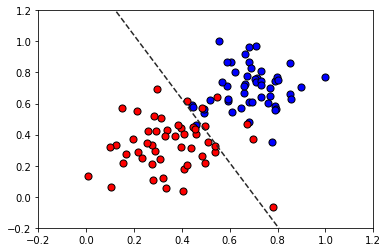

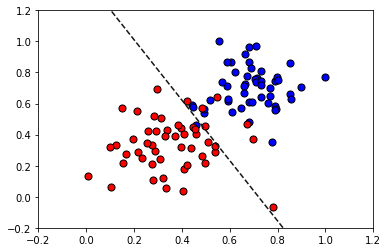

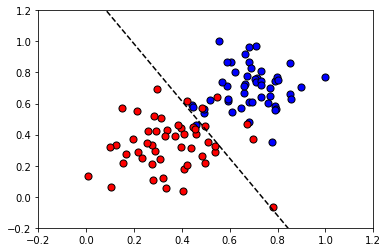

In [7]:
trainPerceptronAlgorithm(X, y, show_each_step=True);

# Sigmoid Function

In [8]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [9]:
def predict_likelihood(x1, x2):
    return sigmoid(4*x1 + 5*x2 - 9)

In [10]:
print(predict_likelihood(1, 1))
print(predict_likelihood(2, 4))
print(predict_likelihood(5, -5))
print(predict_likelihood(-4, 5))

0.5
0.9999999943972036
8.315280276641321e-07
0.5


# Softmax Function

In [11]:
import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

scores = [3.0, 1.0, 0.2]
print(softmax(scores))

[0.8360188  0.11314284 0.05083836]


In [12]:
# Works the same as the one above
def softmax2(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

scores = [3.0, 1.0, 0.2]
print(softmax2(scores))

[0.8360188  0.11314284 0.05083836]


In [13]:
# Works the same as the one above

import numpy as np

def softmax3(L):
    expL = np.exp(L)
    sumExpL = sum(expL)
    result = []
    for i in expL:
        result.append(i*1.0/sumExpL)
    return result
    
    # Note: The function np.divide can also be used here, as follows:
    # def softmax(L):
    #     expL = np.exp(L)
    #     return np.divide (expL, expL.sum())
    
scores = [3.0, 1.0, 0.2]
print(softmax3(scores))

[0.8360188027814407, 0.11314284146556011, 0.05083835575299916]


In [14]:
softmax([0.0, 1.0])

array([0.26894142, 0.73105858])

# Cross-Entropy

In [55]:
import numpy as np

# Write a function that takes as input two lists Y, P,
# and returns the float corresponding to their cross-entropy.
def cross_entropy(Y, P):
    Y = np.float_(Y)
    P = np.float_(P)
    # 1e-9 added to avoid log(0), which is undefined
    return -np.sum(Y * np.log(P + 1e-9) + (1 - Y) * np.log(1 - P + 1e-9))

In [29]:
# Small difference / small entropy
l1 = [1, 1, 0]
l2 = [0.8, 0.6, 0.2]
cross_entropy(l1, l2)

0.9571127263944101

In [56]:
# Big difference / big entropy
l3 = [1, 1, 0]
l4 = [0.8, 0.2, 1]
cross_entropy(l3, l4)

22.55584729444472

# Gradient Descent

See: [GradientDescent.ipynb](Udacity_DS_01_Introduction_to_Neural_Networks/GradientDescent.ipynb) for small data

# Neural Network Architecture

In [65]:
w1 = 2
w2 = 6
b = -2
sigmoid(w1*0.4 + w2*0.6 + b)

0.9168273035060777

In [66]:
w1 = 3
w2 = 5
b = -2.2
sigmoid(w1*0.4 + w2*0.6 + b)

0.8807970779778823

In [67]:
w1 = 5
w2 = 4
b = -3
sigmoid(w1*0.4 + w2*0.6 + b)

0.8021838885585818

# Training a Neural Network

See: [StudentAdmissions.ipynb](Udacity_DS_01_Introduction_to_Neural_Networks/StudentAdmissions.ipynb)